# <center> 🚢Titanic - CatBoostClassifier📈 </center>

<a id="ToC"></a>
# Table of Contents
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. EDA](#3)
    - [3.1 Survived pie plot](#3.1)
    - [3.2 Some columns count plot](#3.2)
    - [3.3 Gender count plot ](#3.3)
    - [3.4 Age & Survived kdeplot](#3.4)
    - [3.5 Heatmap](#3.5)
- [4. Data Processing (columns)](#4)
    - [4.1 Name](#4.1)
    - [4.2 Age](#4.2)
    - [4.3 Ticket](#4.3)
    - [4.4 Cabin](#4.4)
    - [4.5 new -> Relatives](#4.5)
- [5. Model](#5)    
- [6. Evaluation](#6)
    - [6.1 Classification report](#6.1)
    - [6.2 Confusion matrix](#6.2)
    - [6.3 ROC curve](#6.3)
    - [6.4 Feature importance](#6.4)
    - [6.5 Accuracy score](#6.5)
- [7. Submission](#7)

<a id="1"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Introduction </span></center></div>**

![titanic](https://www.rmg.co.uk/sites/default/files/styles/full_width_1440/public/Atlantic%20liner%20%27Titanic%27%20%28Br%2C%201912%29%20sinking%2C%20bow%20first%2C%201912%2C%20with%20eight%20full%20lifeboats%20nearby%20and%20an%20iceberg%20in%20the%20distance_banner.jpg?itok=fQV6kN3z)

### About Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

**On April 15, 1912**, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of **1502** out of **2224** passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### **About Dataset**

The data has been split into two groups:

 - training set (train.csv)
 - test set (test.csv)
 
**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## 1. Introduction to CatBoost

 - CatBoost documentation says that-
"CatBoost is a high-performance open source library for gradient boosting on decision trees.""

 - So, CatBoost is an algorithm for gradient boosting on decision trees.
 - It is a readymade classifier in scikit-learn’s conventions terms that would deal with categorical features automatically.
 - It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML.
 - It can work with diverse data types to help solve a wide range of problems (described later) that businesses face today.
 - It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks.
 - Also, it provides best-in-class accuracy.

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Imports </span></center></div>**

In [1]:
# common
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split

# model
from catboost import CatBoostClassifier, Pool

# metrics
from sklearn.metrics import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <span style="color:#08bf2c;"> Data review </span>

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv", index_col=0)
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col=0)
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col=0)

### <span style="color:#2981d9;"> Train data </span>

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### <span style="color:#2981d9;"> Test data </span>

In [5]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> EDA </span></center></div>**

<a id="3.1"></a>
## <span style="color:#08bf2c;"> Survived pie plot </span>

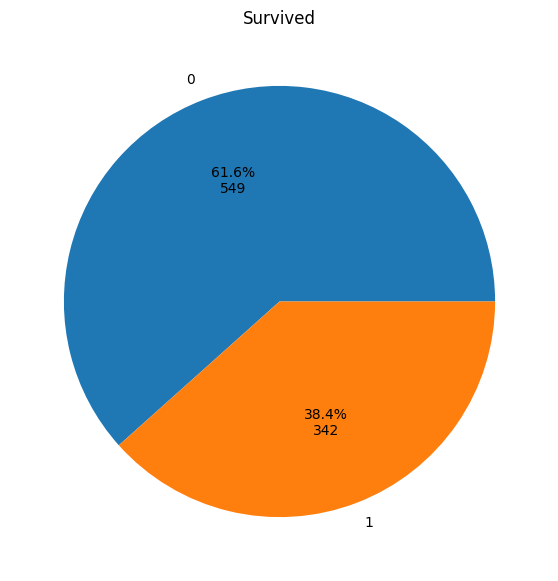

In [7]:
plt.figure(figsize=(7,7))
total = train['Survived'].value_counts().values.sum()
plt.pie(train['Survived'].value_counts().values, labels=train['Survived'].value_counts().index, autopct=lambda x: '{:.1f}%\n{:.0f}'.format(x, total*x/100))
plt.title('Survived')
plt.show()

<a id="3.2"></a>
## <span style="color:#08bf2c;"> Some columns count plot </span>

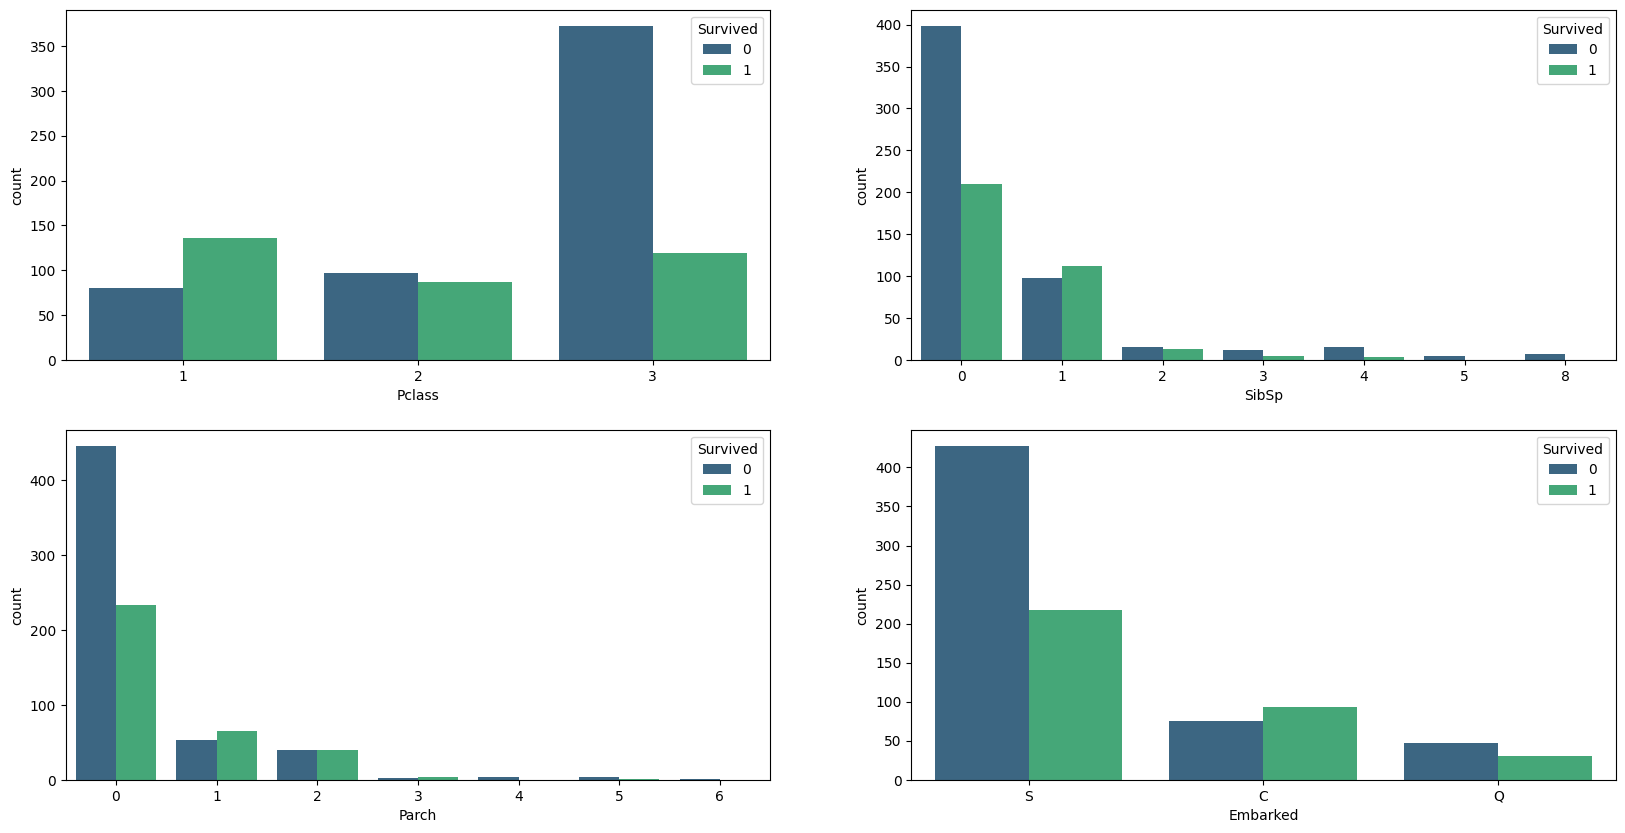

In [8]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

sel_col = ['Pclass', 'SibSp', 'Parch', 'Embarked']

for i in range(2):
    for j in range(2):
        sns.countplot(x=sel_col[i*2+j], hue='Survived', palette='viridis', data=train, ax=axes[i,j])

plt.show()

<a id="3.3"></a>
## <span style="color:#08bf2c;"> Gender count plot </span>

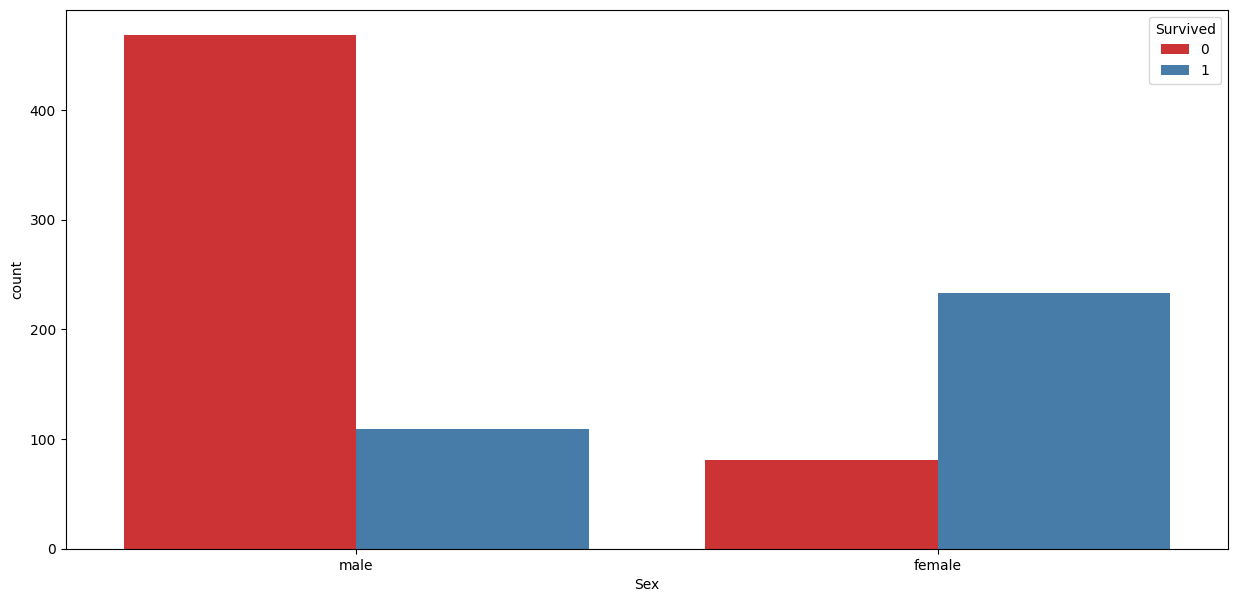

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(data=train, x='Sex', hue='Survived', palette='Set1')
plt.show()

<a id="3.4"></a>
## <span style="color:#08bf2c;"> Age & Survived kdeplot </span>

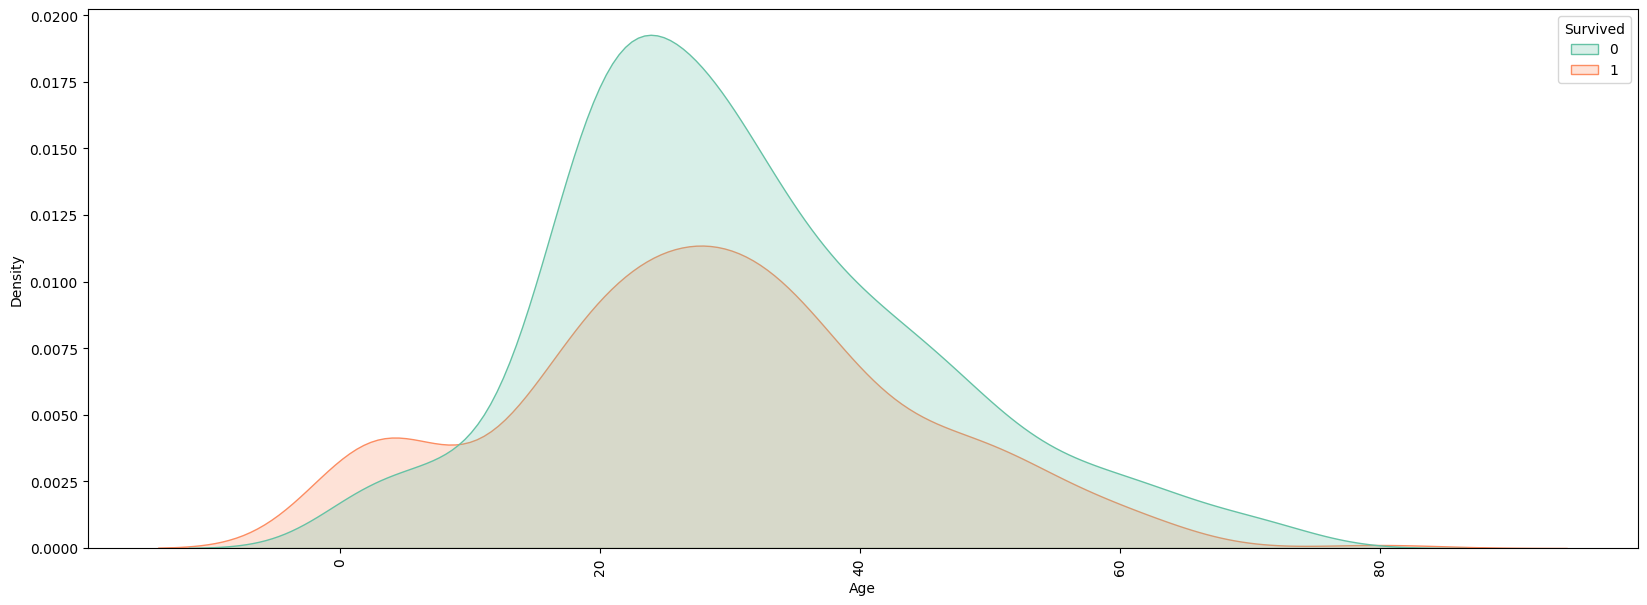

In [10]:
plt.figure(figsize=(20,7))
sns.kdeplot(data=train, x='Age', hue='Survived',fill=True, palette='Set2')
plt.xticks(rotation=90)
plt.show()

<a id="3.5"></a>
## <span style="color:#08bf2c;"> Heatmap </span>

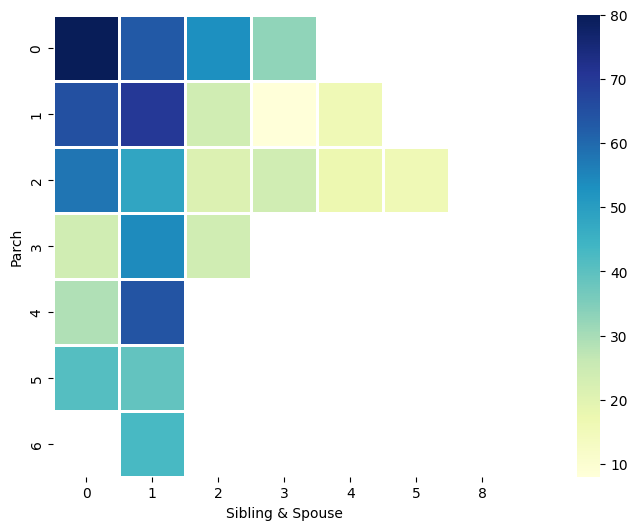

In [11]:
df_m = train[['Parch','SibSp','Age']].groupby(['SibSp','Parch']).max().unstack(level=0)
plt.figure(figsize=(16,6))
sns.heatmap(data=df_m, cmap="YlGnBu", linewidths=1, square=True)
plt.xticks(np.arange(7) + .5, labels=[0,1,2,3,4,5,8])
plt.xlabel('Sibling & Spouse')
plt.show()

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Data Processing </span></center></div>**

In [12]:
# data aggregation
df = pd.concat([train.drop('Survived', axis=1),test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


<a id="4.1"></a>
## <span style="color:#08bf2c;"> Name </span>

In [13]:
# classifying names into 3 classes
df.Name = df.Name.apply(lambda x: x.split(', ')[1].split('. ')[0])

second_class = ['Rev','Mrs']
thirth_class = ['Dona','Jonkheer','the Countess','Capt','Don','Mme','Sir','Lady','Major','Mlle','Col','Dr']
# first class all the rest

# encode using classes
for i in df.Name.value_counts().index:
    if i in thirth_class:
        df.loc[df.Name==i, 'Name'] = '3'
    elif i in second_class:
        df.loc[df.Name==i, 'Name'] = '2'
    else:
        df.loc[df.Name==i, 'Name'] = '1'
df.Name = df.Name.astype('int64')

<a id="4.2"></a>
## <span style="color:#08bf2c;"> Age </span>

In [14]:
# fill the nan values in the age column with numbers between mean - std, mean + std

mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

<a id="4.3"></a>
## <span style="color:#08bf2c;"> Ticket </span>

In [15]:
# divide the Ticket column into 3 parts if it is divide

df.Ticket.replace({'LINE':'0'},inplace=True)
df['ticket_class'] = df.Ticket.apply(lambda x: x.split()[0] if len(x.split())>1 else 'X')
df['ticket_number'] = df.Ticket.apply(lambda x: x.split()[-1][:1]).astype('int64')

<a id="4.4"></a>
## <span style="color:#08bf2c;"> Cabin </span>

In [16]:
# divide the Cabin column to cabin_class and cabin_number

df.Cabin.fillna('X0', inplace=True)
df.Cabin = df.Cabin.apply(lambda x: x.split()[0])
df['cabin_class'] = df['Cabin'].apply(lambda x: x[:1])
df['cabin_number'] = df['Cabin'].apply(lambda x: x[1:])
df.loc[df.cabin_number=='','cabin_number'] = '0'
df.cabin_number = df.cabin_number.astype('int64')


# fill nan values, Embarked column
df.Embarked.fillna(method='ffill', inplace=True)

<a id="4.5"></a>
## <span style="color:#08bf2c;"> new column -> Relatives </span>

In [17]:
# add new common relative count and travelled_alone columns

df['relatives'] = df['SibSp'] + df['Parch']
df.loc[df['relatives']>0, 'travelled_alone'] = 1
df.loc[df['relatives']==0, 'travelled_alone'] = 0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           1309 non-null   int64  
 1   Name             1309 non-null   int64  
 2   Sex              1309 non-null   object 
 3   Age              1309 non-null   float64
 4   SibSp            1309 non-null   int64  
 5   Parch            1309 non-null   int64  
 6   Ticket           1309 non-null   object 
 7   Fare             1308 non-null   float64
 8   Cabin            1309 non-null   object 
 9   Embarked         1309 non-null   object 
 10  ticket_class     1309 non-null   object 
 11  ticket_number    1309 non-null   int64  
 12  cabin_class      1309 non-null   object 
 13  cabin_number     1309 non-null   int64  
 14  relatives        1309 non-null   int64  
 15  travelled_alone  1309 non-null   float64
dtypes: float64(3), int64(7), object(6)
memory usage: 173.9+ KB


### <span style="color:#2981d9;"> Split </span>

In [19]:
# split data and labels
y = train['Survived']
train = df[:891]
test = df[891:]
X = train

# split train-test for modeling
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state=18, test_size=0.2)

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Model </span></center></div>**

In [20]:
# prepare data for model
cat_feat = list(X_train.columns[X_train.dtypes=='object'])   # categorical features

pool_train = Pool(X_train, y_train, cat_features = cat_feat)
pool_test = Pool(X_test, cat_features = cat_feat)

In [21]:
# model
model = CatBoostClassifier(verbose=False, random_state=18)

# model fitting
model.fit(pool_train)

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Evaluation </span></center></div>**

<a id="6.1"></a>
## <span style="color:#08bf2c;"> Classification report </span>

In [22]:
y_pred = model.predict(pool_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       109
           1       0.84      0.81      0.83        70

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



<a id="6.2"></a>
## <span style="color:#08bf2c;"> Confusion matrix </span>

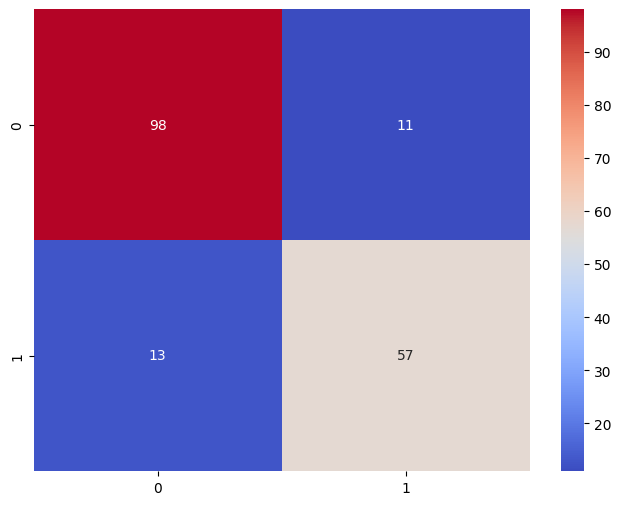

In [23]:
plt.figure(figsize=(8,6))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g", cmap='coolwarm')
plt.show()

<a id="6.3"></a>
## <span style="color:#08bf2c;"> ROC curve </span>

<Figure size 800x600 with 0 Axes>

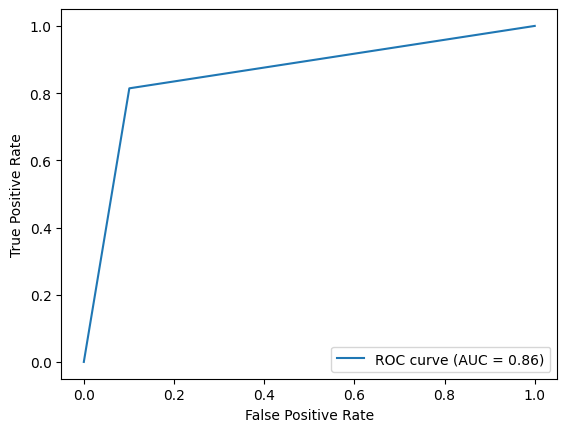

In [24]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

<a id="6.4"></a>
## <span style="color:#08bf2c;"> Feature importance </span>

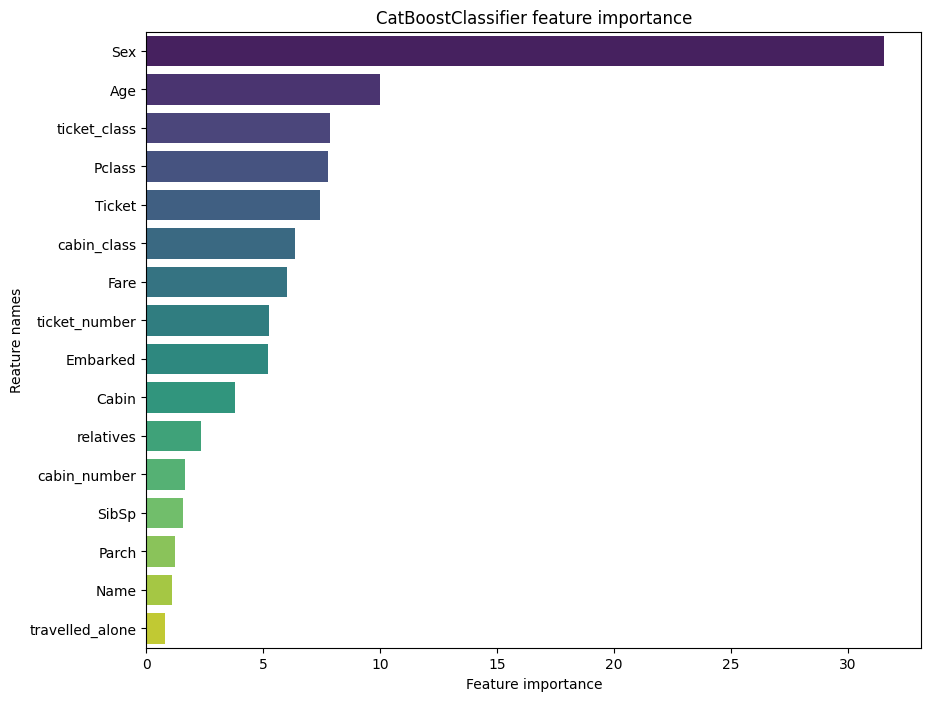

In [25]:
plt.figure(figsize=(10,8))
fs = pd.Series(model.get_feature_importance(), index=X.columns).sort_values(ascending=False)
sns.barplot(x=fs.values, y=fs.index, palette='viridis')
plt.title('CatBoostClassifier feature importance')
plt.xlabel('Feature importance')
plt.ylabel('Reature names')
plt.show()

<a id="6.5"></a>
## <span style="color:#08bf2c;"> Accuracy score </span>

In [26]:
pred = model.predict(pool_test)

print(f'\033[92m')
print("Accuracy score:",accuracy_score(y_test,pred))


Accuracy score: 0.8659217877094972


<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="7"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Submission </span></center></div>**

In [27]:
pool_X = Pool(X, y, cat_features = cat_feat)
pool_y = Pool(test, cat_features = cat_feat)

# model fitting full data
model = CatBoostClassifier(verbose=False, random_state=18)
model.fit(pool_X)

In [28]:
# save submission
submission.Survived = model.predict(pool_y)
submission.to_csv("submission.csv")
pd.read_csv("submission.csv", index_col=0)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<blockquote><p style="font-size:15px; color:#159364; font-family:verdana;">💬Thank you for reading! If you have any feedback or find anything wrong, please let me know!🙂</p></blockquote>